In [1]:
import pandas as pd  #Import pandas libraries

In [2]:
df = pd.read_csv('vending_machine_sales.csv')  #Load the dataset

### About the Dataset(Vending Machine Sales):

This dataset represents vending machine data from various locations in Central New Jersey. 
The locations include:a library, a mall, office location and a manufacturing locations. 

The location and machine data is as follows
(1) Gutten Plans - Frozen dough specialist company that operates 24/5 . Vending machine assigned is GuttenPlans x1367
(2) EB Public Library - Public library that has high foot traffic 5-6 days a week. Vending machine : EB Public Library x1380
(3) Brunswick Sq Mall - Mall with average foot traffic 7 days a week. Vending machine(s) : BSQ Mall x1364 - Zales & BSQ Mall x1366 - ATT
(4) Earle Asphalt - A construction engineering firm that operates 5 days a week. Vending machine : Earle Asphalt x1371


In [4]:
df.head()  #Read the first five rows 

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


#### About this file
This file has the following attributes

*Status* : Represents if the machine data is successfully processed.

*Device ID* : Unique electronic identifier ( also called as ePort) for the vending machine. A machine is allocated a unique ePrt * device

*Location* : Indicates location of the vending machine

*Machine* : User-friendly machine name

*Product* : Product vended from the machine

*Category* : Carbonated / Food / Non-carbonated / Water

*Transaction* : Unique identifier for every transaction

*TransDate* : The Date & time of transaction

*Type* : Type of transaction ( Cash / Credit )

*RCoil* : Coil # used to vend the product

*RPrice* : Price of the Product

*RQty* : Quantity sold. This is usually one but machines can be configured to sell more items in a single transaction

*MCoil* : Mapped coil # used to vend the product ( from toucan )
*MPrice* : Mapped price of the Product

*MQty* : Mapped quantity sold. This is usually one but machines can be configured to sell more items in a single transaction

*LineTotal* : Total sale per transaction

*TransTotal* : Represents total of all transactions that will show up on the Credit Card. A user could vend a drink for $3 and a snack for $1.5 making a total of $4.50

*Prcd Date* : Date when the transaction was processed by SeedLive ( an entity that is used to aggregate all transactions electronically )

In [5]:
df.shape #Checking number of rows and columns 

(9617, 18)

# Data Cleansing 

In [7]:
df.isnull().sum() #Check the total number of missing cells in each column. 

Status           0
Device ID        0
Location         0
Machine          0
Product          6
Category       267
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           3
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

There are 267 missing values under 'Category', 6 under 'Products' and 3 in 'MPrice'. A total of 276 missing values. Cleansing: I will attempt to check through to see if I should replace or drop.

In [11]:
df['Category'].unique()   #Check the unique values in 'Category'

array(['Carbonated', 'Food', 'Non Carbonated', 'Water', nan], dtype=object)

In [9]:
df.loc[df.isnull().any(axis=1)] #display all the rows with NAN values

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
1232,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14835073327,3/16/2022,Credit,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1431,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14873793590,3/24/2022,Cash,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1439,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14878665903,3/25/2022,Credit,120,2.0,1,120,2.0,1,2.0,3.25,3/30/2022
1448,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,NaN,14879782611,3/25/2022,Cash,125,1.0,1,125,1.0,1,1.0,1.00,3/25/2022
1453,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,NaN,14880181107,3/26/2022,Cash,113,1.5,1,113,1.5,1,1.5,1.50,3/25/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,NaN,16138251968,12/20/2022,Credit,152,4.0,2,152,4.0,2,8.0,8.00,12/21/2022
9361,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,NaN,16138317649,12/20/2022,Credit,152,4.0,1,152,4.0,1,4.0,4.00,12/21/2022
9415,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,NaN,16145793793,12/22/2022,Credit,150,4.0,1,150,4.0,1,4.0,5.50,12/22/2022
9419,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Starbucks Doubleshot Energy - Coffee,NaN,16145956174,12/22/2022,Credit,146,4.0,1,146,4.0,1,4.0,4.00,12/22/2022


In [12]:
df['Product'].value_counts()['Doritos Dinamita Chile Lemon']   #Count the number of a unique value in 'Product'

24

In [13]:
# I am replacing the 'Category' null values with 'Food' where the 'Product' is  'Doritos Dinamita Chile Lemon'
df['Category'] = df['Category'].where(df['Product']!='Doritos Dinamita Chile Lemon', 'Food')

In [64]:
df.isnull().sum() #Check the total number of missing cells in each column. 

Status         0
Device ID      0
Location       0
Machine        0
Product        0
Category       0
Transaction    0
TransDate      0
Type           0
RCoil          0
RPrice         0
RQty           0
MCoil          0
MPrice         0
MQty           0
LineTotal      0
TransTotal     0
Prcd Date      0
dtype: int64

In [16]:
df['Product'].value_counts()['Doritos Spicy Nacho']   #Count the number of a unique value in 'Product'

49

In [17]:
# I am replacing the 'Category' null values with 'Food' where the 'Product' is  'Doritos Spicy Nacho'
df['Category'] = df['Category'].where(df['Product']!='Doritos Spicy Nacho', 'Food')

In [20]:
df['Product'].value_counts()['Mini Chips Ahoy - Go Paks']   #Count the number of a unique value in 'Product'

27

In [21]:
# I am replacing the 'Category' null values with 'Food' where the 'Product' is  'Mini Chips Ahoy - Go Paks'
df['Category'] = df['Category'].where(df['Product']!='Mini Chips Ahoy - Go Paks', 'Food')

In [24]:
df['Product'].value_counts()['Oreo Mini - Go Paks']   #Count the number of a unique value in 'Product'

62

In [25]:
# I am replacing the 'Category' null values with 'Food' where the 'Product' is  'Oreo Mini - Go Paks'
df['Category'] = df['Category'].where(df['Product']!='Oreo Mini - Go Paks', 'Food')

In [28]:
df['Product'].value_counts()['Teddy Grahams - Go Paks']   #Count the number of a unique value in 'Product'

20

In [29]:
# I am replacing the 'Category' null values with 'Food' where the 'Product' is  'Teddy Grahams - Go Paks'
df['Category'] = df['Category'].where(df['Product']!='Teddy Grahams - Go Paks', 'Food')

In [32]:
df['Product'].value_counts()['Starbucks Doubleshot Energy - Coffee']   #Count the number of a unique value in 'Product'

25

In [33]:
# I am replacing the 'Category' null values with 'Non Carbonated' where the 'Product' is  'Starbucks Doubleshot Energy - Coffee'
df['Category'] = df['Category'].where(df['Product']!='Starbucks Doubleshot Energy - Coffee', 'Non Carbonated')

In [37]:
df['Product'].value_counts()['Canada Dry - Ginger Ale & Lemonde']   #Count the number of a unique value in 'Product'

39

In [38]:
# I am replacing the 'Category' null values with 'Carbonated' where the 'Product' is  'Canada Dry - Ginger Ale & Lemonde'
df['Category'] = df['Category'].where(df['Product']!='Canada Dry - Ginger Ale & Lemonde', 'Carbonated')

In [41]:
df['Product'].value_counts()['Canada Dry - Ginger Ale']   #Count the number of a unique value in 'Product'

15

In [42]:
# I am replacing the 'Category' null values with 'Carbonated' where the 'Product' is  'Canada Dry - Ginger Ale'
df['Category'] = df['Category'].where(df['Product']!='Canada Dry - Ginger Ale', 'Carbonated')

### At this point, there remain 6 rows with null values under the Prodcut and Category columns. They are all under 'EB Public Library x1380' Machines. Since there are few numbers of rows left, I will drop them.

In [51]:
df.loc[df['Machine'] == 'EB Public Library x1380'] #Select rows with Machine: EB Public Library x1380

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
1183,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Starbucks Doubleshot Energy - Mocha,Non Carbonated,14825036422,3/14/2022,Credit,146,1.00,1,146,1.00,1,1.00,1.00,3/14/2022
1186,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,14825930535,3/14/2022,Credit,142,1.50,1,142,1.50,1,1.50,1.50,3/30/2022
1202,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,14830244867,3/15/2022,Credit,142,1.50,1,142,1.50,1,1.50,1.50,3/30/2022
1207,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Seapoint Farms Dry Roasted Edamame - Wasabi,Food,14830600281,3/15/2022,Credit,122,2.50,1,122,2.50,1,2.50,2.50,3/30/2022
1211,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Spindrift - Sparkling Water - Pineapple,Carbonated,14831173571,3/15/2022,Cash,141,1.50,1,141,1.50,1,1.50,1.50,3/30/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Keto Bar - Creamy Peanut Butter Chocolate,Food,16174032039,12/30/2022,Credit,132,2.00,1,132,2.00,1,2.00,2.00,12/30/2022
9600,Processed,VJ300320692,EB Public Library,EB Public Library x1380,CheezIt - Double Cheese,Food,16174160635,12/30/2022,Credit,123,1.50,1,123,1.50,1,1.50,1.50,12/30/2022
9601,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Snyder's of Hanover Pretzel - Cheddar Cheese,Food,16174164145,12/30/2022,Credit,120,2.50,1,120,2.50,1,2.50,2.50,12/30/2022
9602,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,16174167366,12/30/2022,Credit,141,2.00,1,141,2.00,1,2.00,2.00,12/30/2022


### Dropping the remaining rows with null values (6 row)

In [58]:
df.loc[df.isnull().any(axis=1)] #display all the rows with NAN values

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
1232,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14835073327,3/16/2022,Credit,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1431,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14873793590,3/24/2022,Cash,120,2.0,1,120,2.0,1,2.0,2.00,3/30/2022
1439,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14878665903,3/25/2022,Credit,120,2.0,1,120,2.0,1,2.0,3.25,3/30/2022
5500,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15469028445,8/2/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,8/2/2022
6947,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15690095789,9/19/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,9/19/2022
7460,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15779665847,10/6/2022,Cash,133,1.5,1,133,NaN,1,1.5,1.50,10/6/2022


In [62]:
df.dropna() #Dropping the remaining rows with null values (6 row)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Nacho Cheese,Food,16175373362,12/30/2022,Cash,112,1.5,1,112,1.5,1,1.5,1.5,12/30/2022
9613,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022
9614,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,12/31/2022,Cash,137,2.0,1,137,2.0,1,2.0,2.0,12/31/2022
9615,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176914301,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022


In [63]:
df.shape

(9611, 18)

In [69]:
df.duplicated().sum()   #Checking for duplicates

0

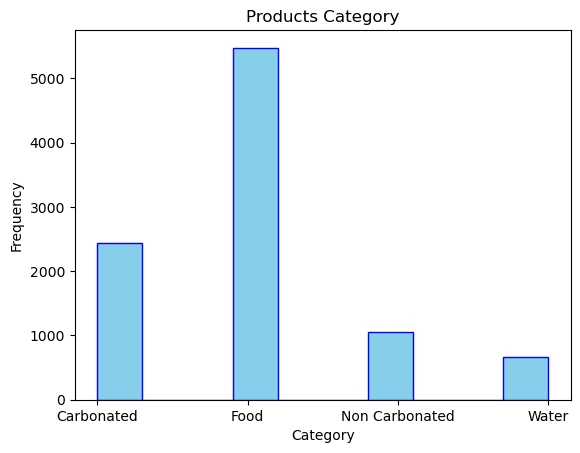

In [81]:
import matplotlib.pyplot as plt
#Checking through the products category
plt.hist(df['Category'], color='skyblue', bins = 10, edgecolor='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Products Category')
plt.show()

In [83]:
import numpy as np
numeric_df = df.select_dtypes(include=np.number) # Select all numeric columns
numeric_df

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,14515778905,148,3.5,1,148,3.5,1,3.5,3.5
1,14516018629,148,3.5,1,148,3.5,1,3.5,5.0
2,14516018629,123,1.5,1,123,1.5,1,1.5,5.0
3,14516020373,123,1.5,1,123,1.5,1,1.5,1.5
4,14516021756,148,3.5,1,148,3.5,1,3.5,3.5
...,...,...,...,...,...,...,...,...,...
9612,16175373362,112,1.5,1,112,1.5,1,1.5,1.5
9613,16176802941,143,1.5,1,143,1.5,1,1.5,1.5
9614,16176909481,137,2.0,1,137,2.0,1,2.0,2.0
9615,16176914301,143,1.5,1,143,1.5,1,1.5,1.5


In [87]:
#Using Z_SCORES to check for outliers
for y in numeric_df.columns:
   for x in numeric_df[y]:
    mean = numeric_df[y].mean()
    std = numeric_df[y].std()
    z_score = (x - mean)/std
    if -3 <= z_score >= 3:
        print(y,x,z_score)

RPrice 4.5 3.6372323350496467
RPrice 4.5 3.6372323350496467
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 4.5 3.6372323350496467
RPrice 4.5 3.6372323350496467
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RPrice 5.0 4.352766875468482
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 2 7.7351975116414
RQty 3 15.5863943945630

LineTotal 5.5 4.7208560339407
LineTotal 4.5 3.377540913339566
LineTotal 8.0 8.079143835443537
LineTotal 4.5 3.377540913339566
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 6.0 5.392513594241267
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 8.0 8.079143835443537
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 6.0 5.392513594241267
LineTotal 7.0 6.735828714842402
LineTotal 5.0 4.049198473640133
LineTotal 7.5 7.407486275142969
LineTotal 5.0 4.049198473640133
LineTotal 8.0 8.079143835443537
LineTotal 5.0 4.049198473640133
LineTotal 5.0 4.049198473640133
LineTotal 6.0 5.392513594241267
LineTotal 5.0 4.049198473640133
LineTotal 

TransTotal 6.0 3.4841516921164186
TransTotal 6.0 3.4841516921164186
TransTotal 7.0 4.40603922808985
TransTotal 7.0 4.40603922808985
TransTotal 8.0 5.32792676406328
TransTotal 5.5 3.0232079241297036
TransTotal 5.5 3.0232079241297036
TransTotal 7.0 4.40603922808985
TransTotal 7.0 4.40603922808985
TransTotal 6.5 3.9450954601031345
TransTotal 6.5 3.9450954601031345
TransTotal 5.5 3.0232079241297036
TransTotal 5.5 3.0232079241297036
TransTotal 8.0 5.32792676406328
TransTotal 6.0 3.4841516921164186
TransTotal 6.0 3.4841516921164186
TransTotal 7.75 5.097454880069923
TransTotal 7.75 5.097454880069923
TransTotal 7.75 5.097454880069923
TransTotal 8.0 5.32792676406328
TransTotal 5.5 3.0232079241297036
TransTotal 5.5 3.0232079241297036
TransTotal 5.5 3.0232079241297036
TransTotal 5.5 3.0232079241297036
TransTotal 6.5 3.9450954601031345
TransTotal 6.5 3.9450954601031345
TransTotal 6.5 3.9450954601031345


In [91]:
def extract_outliers(df, column):
    z_score = (df[column] - df[column].mean())/df[column].std()
    #print(z_score.value)
    outlier = df[np.abs(z_score) >= 3]
    #print(outlier)
    df_outlier = outlier[column]
    return df_outlier
    
extract_outliers(numeric_df, 'TransTotal')

158     5.5
195     5.5
196     5.5
423     6.0
424     6.0
       ... 
9422    5.5
9423    5.5
9438    6.5
9439    6.5
9440    6.5
Name: TransTotal, Length: 230, dtype: float64

In [ ]:
#I wont be removing the outliers

# EDA

In [97]:
df.head(3)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022


In [103]:
import matplotlib.pyplot as plt
import seaborn as sn

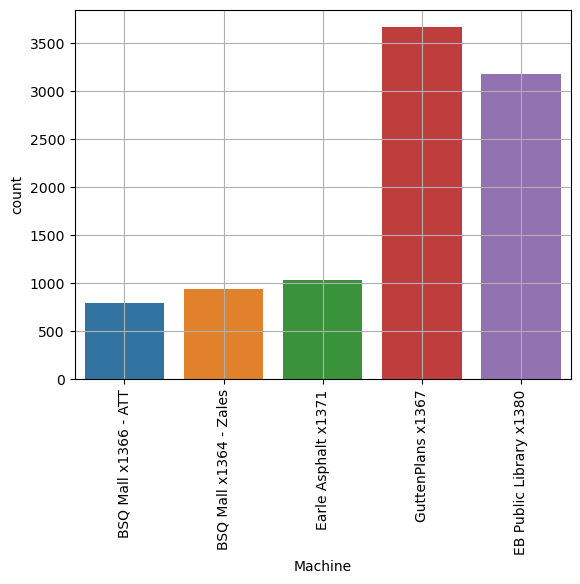

In [118]:
sn.countplot(x = "Machine", data = df) #Creating a bar chart showing the count of Machine.
plt.grid()
plt.xticks(rotation=90)
plt.show() #Displaying the chart

In [115]:
#Calculating total Sales from each machine
machine_sales = df.groupby('Machine')['TransTotal'].sum()
machine_sales

Machine
BSQ Mall x1364 - Zales     1900.00
BSQ Mall x1366 - ATT       1808.00
EB Public Library x1380    7736.75
Earle Asphalt x1371        1956.50
GuttenPlans x1367          7941.25
Name: TransTotal, dtype: float64

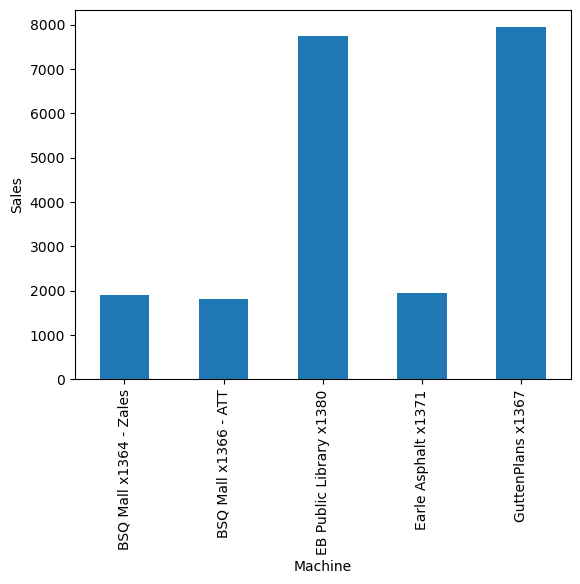

In [199]:
machine_sales.plot(kind='bar')
plt.ylabel('Sales')
plt.show()

In [232]:
##Location-Based Analysis
#Calculating total Sales from each location
location_sales = df.groupby('Location')['TransTotal'].sum()
location_sales
#Convert the result into a dataframe
df_location_sales = location_sales.reset_index(name='sum')
df_location_sales

,Location,sum
0,Brunswick Sq Mall,3708.00
1,EB Public Library,7736.75
2,Earle Asphalt,1956.50
3,GuttenPlans,7941.25


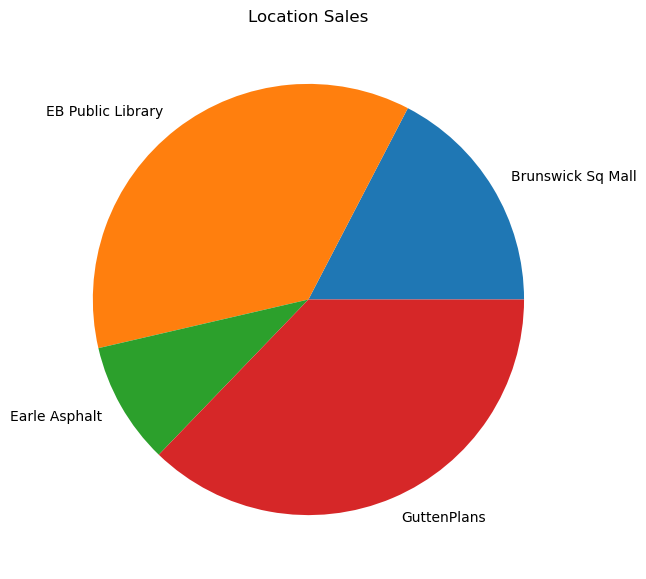

In [242]:
# df_location_sales['sum'].plot(kind='pie', subplots=True)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df_location_sales['sum'],labels=df_location_sales['Location'].unique())
plt.title('Location Sales')
plt.show()

In [ ]:
#What are the factors contributing to the success of EB Public Library and GuttenPlans massive sales??

In [158]:
#CLEANSING: Coverting date to datetime
df['TransDate'] = pd.to_datetime(df['TransDate']) #Converting date to datetime column
df['Prcd Date'] = pd.to_datetime(df['Prcd Date']) #Converting date to datetime column

In [156]:
#Calculating total Sales from each Date processed
date_sales = df.groupby('TransDate')['TransTotal'].count()
date_sales

TransDate
2022-01-01     5
2022-01-02     1
2022-01-03    15
2022-01-04    16
2022-01-05     9
              ..
2022-12-27    26
2022-12-28    34
2022-12-29    18
2022-12-30    32
2022-12-31     4
Name: TransTotal, Length: 362, dtype: int64

In [161]:
#grouping total sales by month and applying sum
mdat_sales = df.groupby(df['TransDate'].dt.strftime('%B'))['TransTotal'].sum().sort_values()
mdat_sales

TransDate
January       950.75
February     1050.50
March        1331.00
December     1550.00
November     1762.25
April        1790.25
October      1892.25
May          1894.25
September    2013.00
June         2177.25
August       2402.00
July         2529.00
Name: TransTotal, dtype: float64

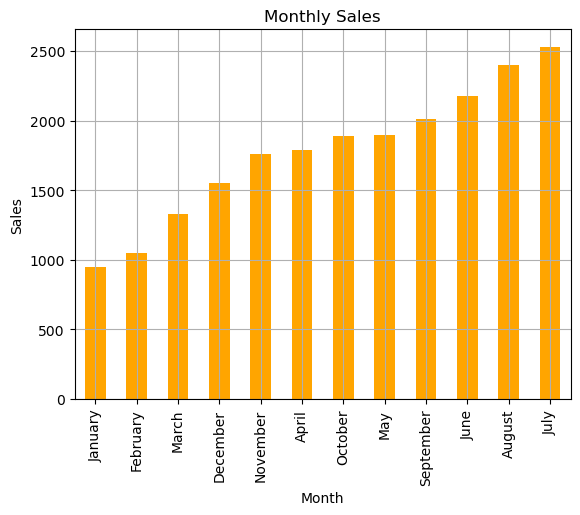

In [251]:
# Plotting Monthly Sales
mdat_sales.plot(kind='bar',color='orange')
plt.title('Monthly Sales')
plt.ylabel('Sales')
plt.grid()
plt.xlabel('Month')
plt.show()

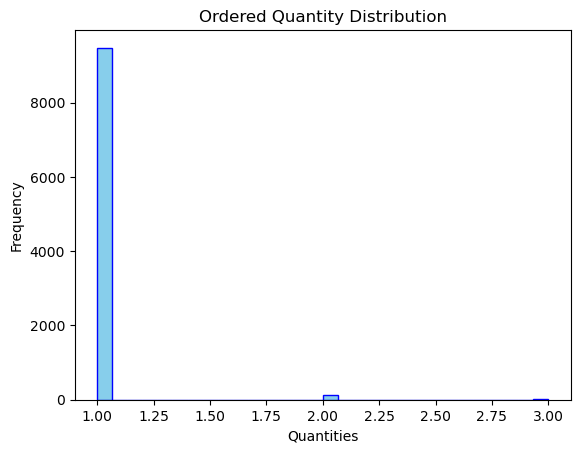

In [146]:
#Quantity Ordered
plt.hist(df['RQty'], color='skyblue', bins = 30, edgecolor='blue')
plt.xlabel('Quantities')
plt.ylabel('Frequency')
plt.title('Ordered Quantity Distribution')
plt.show()

In [210]:
#Group total Sales by products and sort in ascending order
product_sales = df.groupby('Product')['TransTotal'].sum().sort_values(ascending=True)
product_sales.tail(10)

Product
SunChips Multigrain - Harvest Cheddar     386.00
Snapple Tea - Raspberry                   412.75
Wonderful Pistachios - Variety            467.00
Starbucks Doubleshot Energy - Mocha       496.50
Coca Cola - Regular                       563.50
KitKat - Crisp Wafers                     750.25
Poland Springs Water                      788.25
Red Bull - Original                       825.50
Coca Cola - Zero Sugar                   1081.00
Monster Energy Original                  1583.00
Name: TransTotal, dtype: float64

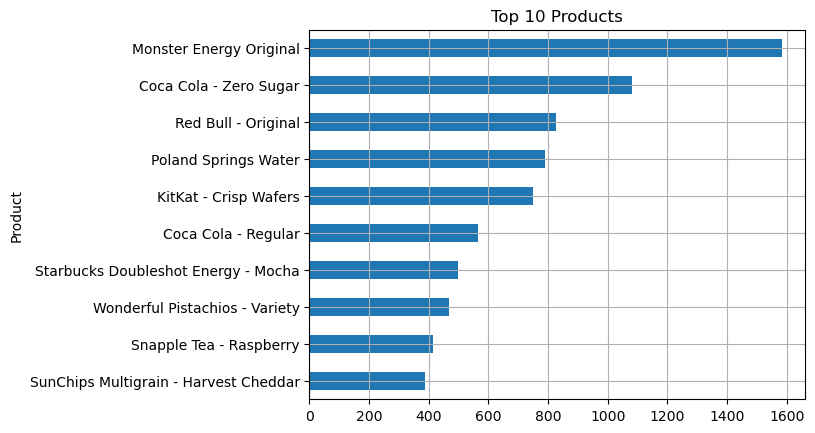

In [211]:
product_sales.tail(10).plot(kind='barh') #Plot the first ten rows
plt.title('Top 10 Products')
plt.grid()

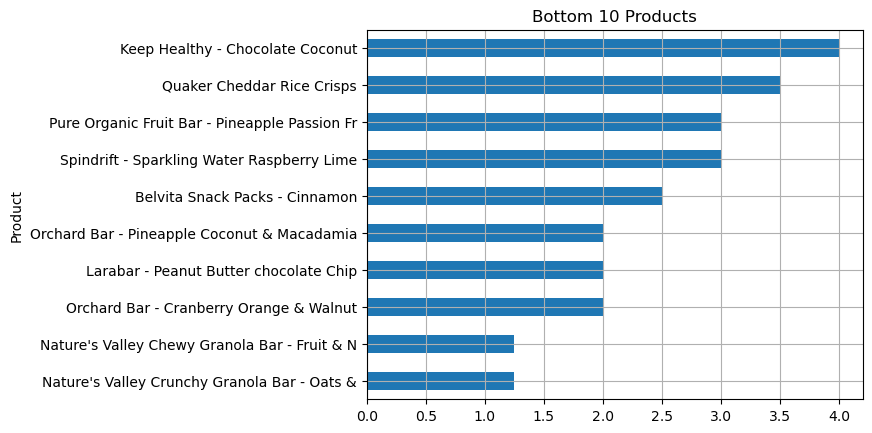

In [213]:
product_sales.head(10).plot(kind='barh') #Plot the last ten rows
plt.title('Bottom 10 Products')
plt.grid()

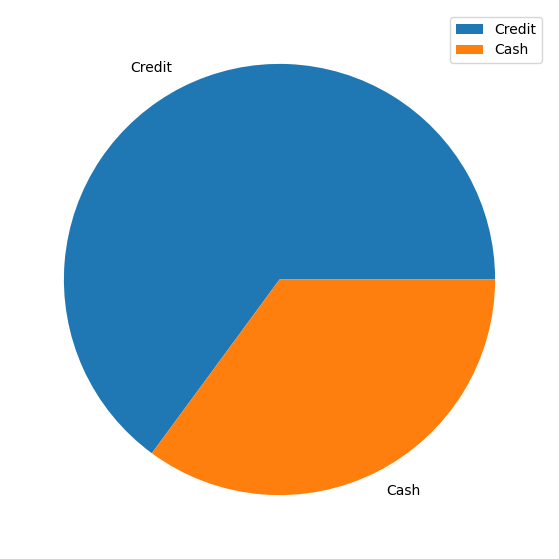

In [181]:
# Plotting Transaction Type
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Type'].value_counts(),labels=df['Type'].unique())
plt.legend()
plt.show()

In [228]:
#Showing the total count of each unique value transaction type within each location. 
lc = df.groupby('Location')['Type'].value_counts()
#Convert the result into a dataframe
df_lc = lc.reset_index(name='count')
#Pivot the data to have 'Type' as columns
pivot_df_lc = df_lc.pivot(index='Location', columns='Type', values='count')
pivot_df_lc

Type,Cash,Credit
Location,,
Brunswick Sq Mall,1036,703
EB Public Library,1639,1538
Earle Asphalt,693,341
GuttenPlans,2871,790


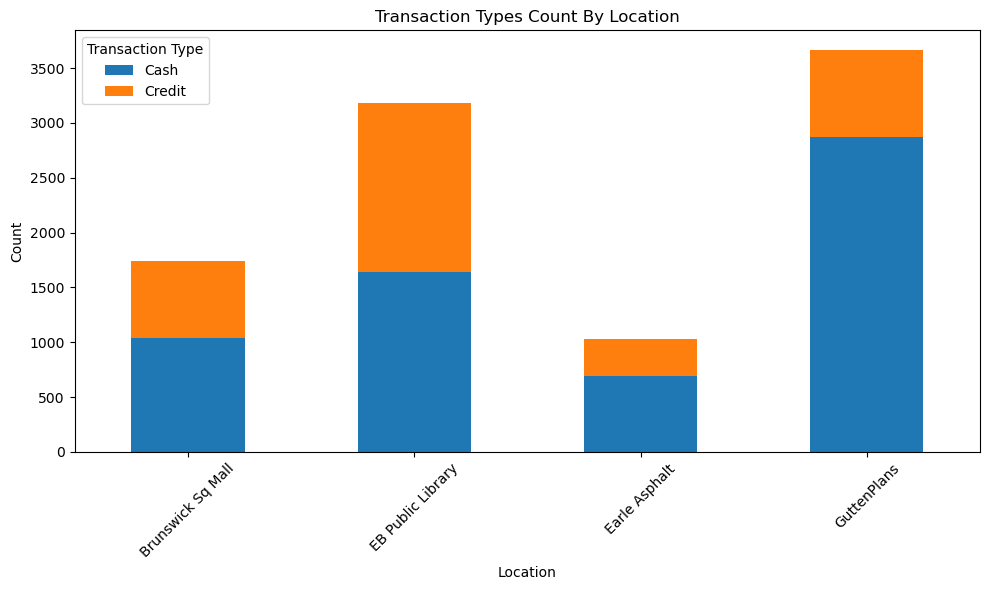

In [229]:
#Plotting
pivot_df_lc.plot(kind="bar", stacked=True, figsize=(10,6))
plt.xlabel("Location")
plt.ylabel('Count')
plt.title('Transaction Types Count By Location')
plt.legend(title='Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#GuttenPlans x1367 has the highest count.Followed closely by EB Public Library x1380
#GuttenPalns x1367 also has the highest sales. Followed closely by EB Public Library x1380
#The other machines are averagely low on sales @ about 1900
#Most people ordered for one qty of the products
#Summer is the best time for sales (June-September). July is the peak of sales.
-Products with highest sales
# Monster Energy Original                  1583.00
# Coca Cola - Zero Sugar                   1081.00
# Red Bull - Original                       825.50
- Mode of Payment
#Most People prefer to pay with their credit card
